# Análisis Exploratorio de Datos

Se importa las librerias a utilizar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display

Se crea un DataFrame con los datos de la Categoría Educación

In [2]:
df = pd.read_csv('data_educacion.csv')

Un .info() para tener idea de cuantas columnas y que tipo de datos hay en cada una de ellas, y si tenemos datos Nan

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   país            176 non-null    object 
 1   codigo_pais     176 non-null    object 
 2   factor_(serie)  176 non-null    object 
 3   codigo_serie    176 non-null    object 
 4   1987            15 non-null     float64
 5   1988            17 non-null     float64
 6   1989            20 non-null     float64
 7   1990            32 non-null     float64
 8   1991            32 non-null     float64
 9   1992            17 non-null     float64
 10  1993            17 non-null     float64
 11  1994            20 non-null     float64
 12  1995            13 non-null     float64
 13  1996            13 non-null     float64
 14  1997            11 non-null     float64
 15  1998            3 non-null      float64
 16  1999            15 non-null     float64
 17  2000            25 non-null     flo

In [4]:
df.head()

,país,codigo_pais,factor_(serie),codigo_serie,1987,1988,1989,1990,1991,1992,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afganistán,AFG,"Nivel de instrucción, al menos ciclo inferior ...",SE.SEC.CUAT.LO.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,13.1258,NaN,NaN,NaN,NaN,NaN,11.6319,15.3429
1,Afganistán,AFG,"Nivel de instrucción, al menos ciclo superior ...",SE.SEC.CUAT.UP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9.7924,NaN,NaN,NaN,NaN,NaN,9.4613,12.5973
2,Afganistán,AFG,"Nivel de instrucción, al menos escuela de nive...",SE.SEC.CUAT.PO.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.7049,NaN
3,Afganistán,AFG,Tasa de finalización del ciclo inferior de la ...,SE.SEC.CMPT.LO.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,52.5213,54.6933,56.7369,59.7218,NaN,NaN,NaN
4,Alemania,DEU,"Nivel de instrucción, al menos ciclo inferior ...",SE.SEC.CUAT.LO.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,96.6718,96.7991,96.7161,96.5136,NaN,96.3323,NaN,95.6804,NaN,NaN


Se utiliza .describe() para obtener una visión general de las estadísticas clave de las columnas numéricas en tu conjunto de datos

In [27]:
columnas = ['1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001','2002', '2003']
descripcion1 = df[columnas].describe().round(2)
descripcion1

,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003
count,15.00,17.00,20.00,32.00,32.00,17.00,17.00,20.00,13.00,13.00,11.00,3.00,15.00,25.00,37.00,40.00,39.00
mean,57.26,51.36,49.96,44.87,48.59,52.60,52.81,65.21,55.92,44.84,55.52,88.49,64.48,45.75,44.11,54.14,55.11
std,30.39,34.11,34.30,31.31,29.90,32.28,26.71,30.81,26.68,28.72,28.12,15.40,25.45,28.78,26.44,27.69,27.54
min,0.92,1.00,1.58,1.74,1.65,1.70,5.66,5.86,6.07,6.47,5.98,70.81,24.85,4.27,4.57,4.17,4.59
25%,39.31,29.09,23.08,19.53,32.54,31.77,30.13,47.00,32.80,25.58,39.76,83.27,42.65,30.06,24.69,36.13,35.80
50%,53.95,43.84,49.39,36.22,48.12,60.50,48.25,63.79,60.04,45.12,64.10,95.72,62.50,41.84,41.50,50.00,55.76
75%,81.59,79.99,70.32,65.74,63.81,65.78,66.65,87.37,72.71,61.87,71.19,97.33,84.29,67.01,62.94,81.04,79.25
max,108.85,108.95,108.20,106.51,106.47,107.71,107.14,111.39,104.56,99.16,101.06,98.93,98.69,98.68,98.82,101.33,102.24


El análisis se divide en dos secciones debido al amplio rango de años considerado, que abarca desde 1987 hasta 2022. Esta separación facilita la evaluación detallada de los indicadores a lo largo de un extenso período temporal.

In [25]:
columnas = ['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
descripcion2 = df[columnas].describe().round(2)
descripcion2

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,57.00,63.00,68.00,72.00,68.00,79.00,85.00,87.00,82.00,64.00,89.00,86.00,88.00,75.00,76.00,81.00,83.00,58.00,19.00
mean,55.53,57.89,53.04,53.76,57.83,58.46,62.71,61.32,61.17,64.68,61.41,60.80,65.42,65.34,63.19,64.40,68.78,69.07,56.94
std,29.09,27.04,27.01,29.72,27.22,30.24,27.81,28.40,29.72,26.10,29.42,28.97,25.31,27.54,30.66,30.00,26.55,30.22,32.17
min,5.47,6.81,1.84,0.27,1.85,2.04,7.92,9.34,1.70,11.69,0.00,5.83,13.48,8.16,2.02,4.56,10.96,4.70,12.60
25%,32.51,35.12,32.91,32.10,37.70,33.45,39.47,36.98,37.79,44.58,37.67,35.25,45.69,46.61,41.03,40.84,49.22,50.28,31.16
50%,57.12,59.33,50.77,52.06,57.74,63.18,65.52,66.57,61.51,69.16,69.42,68.96,70.01,68.85,68.03,70.41,75.11,75.08,54.12
75%,80.83,80.80,73.79,75.79,79.13,83.69,86.43,86.67,87.47,89.48,88.31,87.45,89.03,91.27,92.69,91.03,92.51,95.69,87.49
max,101.23,101.41,102.53,103.20,103.00,102.46,102.90,105.29,115.66,100.79,99.86,101.78,107.37,104.85,103.38,129.95,111.69,108.79,101.38


Este Dataset comprende un extenso periodo, desde 1987 hasta 2022, con un rango variable de observaciones, desde un mínimo de 3 a un máximo de 89. Las desviaciones estándar permanecen consistentes, entre 25 y 32, destacando la dispersión de los datos en cada año. La media de los indicadores se mantiene alrededor de 60-70, mostrando cierta estabilidad a lo largo de las décadas. Los valores mínimo y máximo varían notablemente, desde 0 hasta 12.60 como mínimo, y desde 99.86 hasta 129.95 como máximo, evidenciando la amplitud y diversidad de los datos a lo largo del tiempo. En resumen, el conjunto de datos proporciona un amplio espectro para analizar tendencias, cambios y distribución de indicadores específicos para múltiples países a lo largo de un amplio período temporal.

Para conocer si tenemos valores faltantes en las columnas de ['país'] ['codigo_pais'] ['factor_(serie)'] ['codigo_serie']

In [6]:
print(df['país'].isna().sum())
print(df['codigo_pais'].isna().sum())
print(df['factor_(serie)'].isna().sum())
print(df['codigo_serie'].isna().sum())


0
0
0
0


Veamos en que países se encuentran en estudio.

In [7]:
cantidad_paises = len(df['país'].unique())
print('Cantidad de paises en estudio:',cantidad_paises)
pd.DataFrame(df['país'].unique(), columns=['Países'])

Cantidad de paises en estudio: 44


,Países
0,Afganistán
1,Alemania
2,Argelia
3,Arabia Saudita
4,Argentina
5,Australia
6,Austria
7,Brasil
8,Burkina Faso
9,China


El conjunto de países en estudio refleja una diversidad geográfica significativa, representando un total de 43 naciones. Esta recopilación abarca una amplia distribución global, incluyendo países de distintos continentes, como Asia con naciones como China, India, y Japón; Europa con Alemania, España y Noruega; América con Estados Unidos, Argentina y Venezuela; África con Argelia, Nigeria y Rwanda; Oceanía con Australia, Fiji y Nueva Zelanda, entre otros. Esta diversidad geográfica sugiere una representación global en los datos, proporcionando la oportunidad de estudiar y comparar patrones, tendencias y características distintivas de cada continente en el análisis.

Veamos que Factores se estudian en la Categoría educación

In [8]:
cantidad_series = len(df['factor_(serie)'].unique())
print('Cantidad de variables en estudio la categoría Educación:',cantidad_series)
serie_unicos = df['factor_(serie)'].unique()
print(serie_unicos)

Cantidad de variables en estudio la categoría Educación: 4
['Nivel de instrucción, al menos ciclo inferior de la escuela secundaria completo, población de más de 25 años, total (%) (acumulativo)'
 'Nivel de instrucción, al menos ciclo superior de la escuela secundaria completo, población de más de 25 años, total (%) (acumulativo)'
 'Nivel de instrucción, al menos escuela de nivel posterior a la secundaria completa, población de más de 25 años, total (%) (acumulativo)'
 'Tasa de finalización del ciclo inferior de la educación secundaria, total (% del grupo etario pertinente)']


In [9]:
grupos = df.groupby('factor_(serie)').groups


In [10]:
grupos = df.groupby('factor_(serie)')

# Iterar a través de los grupos y convertirlos en DataFrames individuales
dataframes_por_grupo = {}
for nombre_grupo, grupo in grupos:
    dataframes_por_grupo[nombre_grupo] = grupo.reset_index(drop=True)

# Ahora dataframes_por_grupo contiene un DataFrame por cada grupo


In [11]:
dataframes_por_grupo['Tasa de finalización del ciclo inferior de la educación secundaria, total (% del grupo etario pertinente)']

,país,codigo_pais,factor_(serie),codigo_serie,1987,1988,1989,1990,1991,1992,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afganistán,AFG,Tasa de finalización del ciclo inferior de la ...,SE.SEC.CMPT.LO.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,52.5213,54.6933,56.7369,59.7218,NaN,NaN,NaN
1,Alemania,DEU,Tasa de finalización del ciclo inferior de la ...,SE.SEC.CMPT.LO.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.8736,NaN
2,Argelia,DZA,Tasa de finalización del ciclo inferior de la ...,SE.SEC.CMPT.LO.ZS,NaN,NaN,61.9400,58.7560,57.8834,60.4996,...,89.6741,81.3654,76.3357,77.5487,NaN,78.4607,77.2315,NaN,84.5234,76.0697
3,Arabia Saudita,SAU,Tasa de finalización del ciclo inferior de la ...,SE.SEC.CMPT.LO.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,ARG,Tasa de finalización del ciclo inferior de la ...,SE.SEC.CMPT.LO.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,88.3374,88.4963,90.4596,90.7401,91.8130,93.5833,95.9255,95.4993,108.7882,NaN
5,Australia,AUS,Tasa de finalización del ciclo inferior de la ...,SE.SEC.CMPT.LO.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Austria,AUT,Tasa de finalización del ciclo inferior de la ...,SE.SEC.CMPT.LO.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0143,98.4089,99.8130,95.8072,98.5185,96.5090,97.7948,96.1188,99.6849,NaN
7,Brasil,BRA,Tasa de finalización del ciclo inferior de la ...,SE.SEC.CMPT.LO.ZS,37.1231,NaN,NaN,NaN,NaN,46.5011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Burkina Faso,BFA,Tasa de finalización del ciclo inferior de la ...,SE.SEC.CMPT.LO.ZS,NaN,4.1818,4.9037,5.0818,5.1251,5.6875,...,20.9734,24.2690,26.5352,29.5893,36.3830,42.2713,40.4124,40.3846,37.5703,30.7038
9,China,CHN,Tasa de finalización del ciclo inferior de la ...,SE.SEC.CMPT.LO.ZS,NaN,NaN,NaN,56.7808,58.0583,62.9394,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Crear una lista con los nombres de los países en el DataFrame
paises = df['país'].unique().tolist()

# Crear un widget de menú desplegable (dropdown) para seleccionar un país
dropdown_paises = widgets.Dropdown(
    options=['Todos'] + paises,  # Opción adicional para mostrar todos los países
    description='Seleccionar país:'
)

# Función para filtrar y mostrar los datos según el país seleccionado
def mostrar_datos_por_pais(pais):
    if pais == 'Todos':
        display(df)  # Muestra todos los datos si se selecciona 'Todos'
    else:
        datos_filtrados = df[df['país'] == pais]
        display(datos_filtrados)

# Interactividad: enlazar el widget de menú desplegable a la función de filtrado
widgets.interactive(mostrar_datos_por_pais, pais=dropdown_paises)

interactive(children=(Dropdown(description='Seleccionar país:', options=('Todos', 'Afganistán', 'Alemania', 'A…

In [16]:
#Crear una lista con los nombres de los países en el DataFrame
paises = df['país'].unique().tolist()
# Crear un widget de menú desplegable (dropdown) para seleccionar un país
dropdown_paises = widgets.Dropdown(
    options=paises,
    description='Seleccionar país:'
)
# Función para graficar los datos por país seleccionado
def graficar_datos_por_pais(pais):
    datos_pais = df[df['país'] == pais]
    columnas_años = datos_pais.columns[4:]  # Suponiendo que las columnas de años comienzan desde la cuarta columna
    fig = go.Figure()
    for i in range(len(datos_pais)):
        valores = datos_pais.iloc[i, 4:]
        nombre_variable = datos_pais.iloc[i]['factor_(serie)']  # Obtener el nombre de la variable
        fig.add_trace(go.Scatter(x=columnas_años, y=valores, mode='lines+markers', name=nombre_variable))
    fig.update_layout(
        title=f'Datos para {pais}',
        xaxis_title='Año',
        yaxis_title='Valor'
    )
    fig.show()
# Mostrar un widget vacío para eliminar el gráfico por defecto
display(widgets.Output())
# Interactividad: enlazar el widget de menú desplegable a la función de graficado
widgets.interactive(graficar_datos_por_pais, pais=dropdown_paises)

Output()

interactive(children=(Dropdown(description='Seleccionar país:', options=('Afganistán', 'Alemania', 'Argelia', …

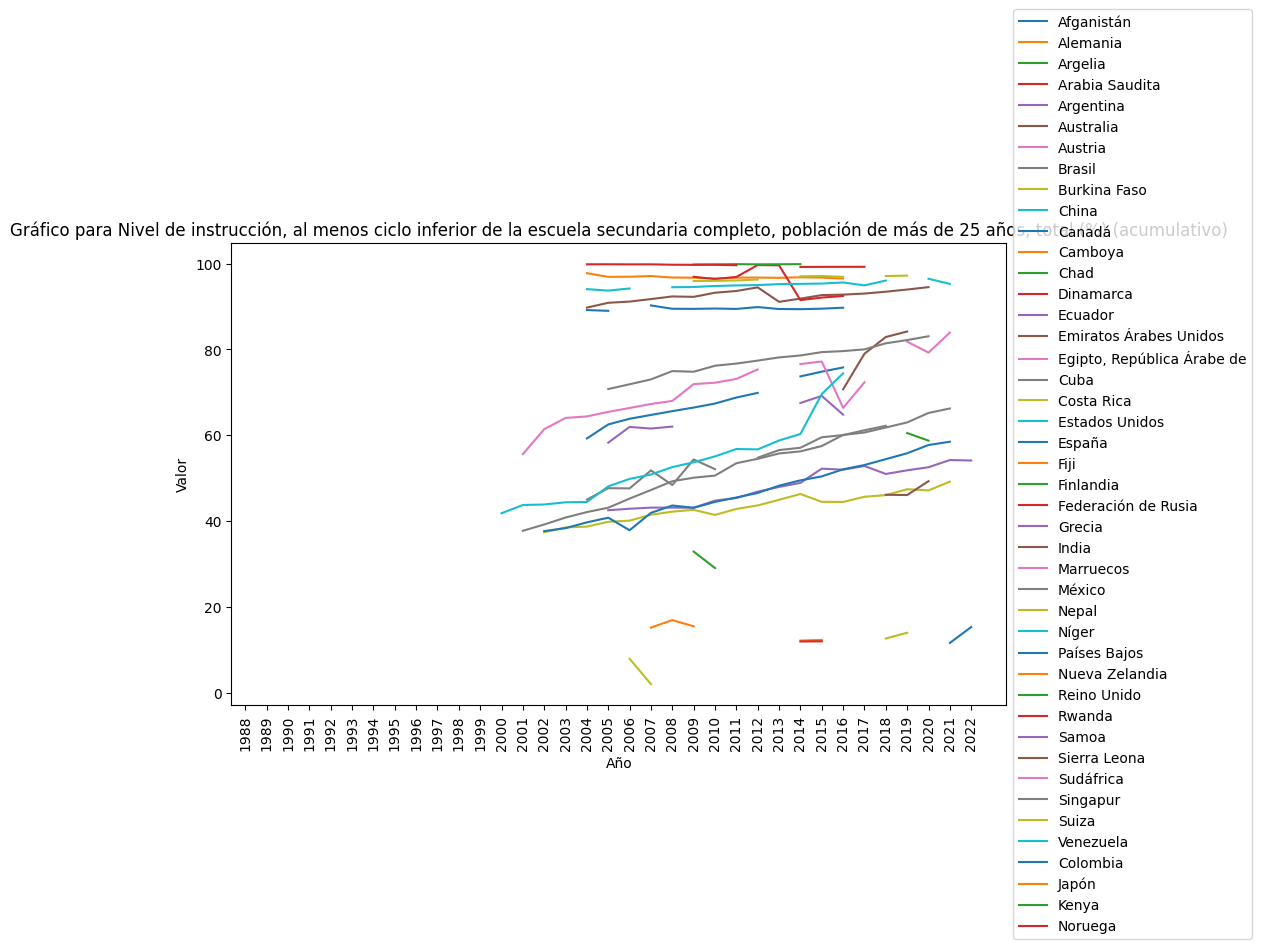

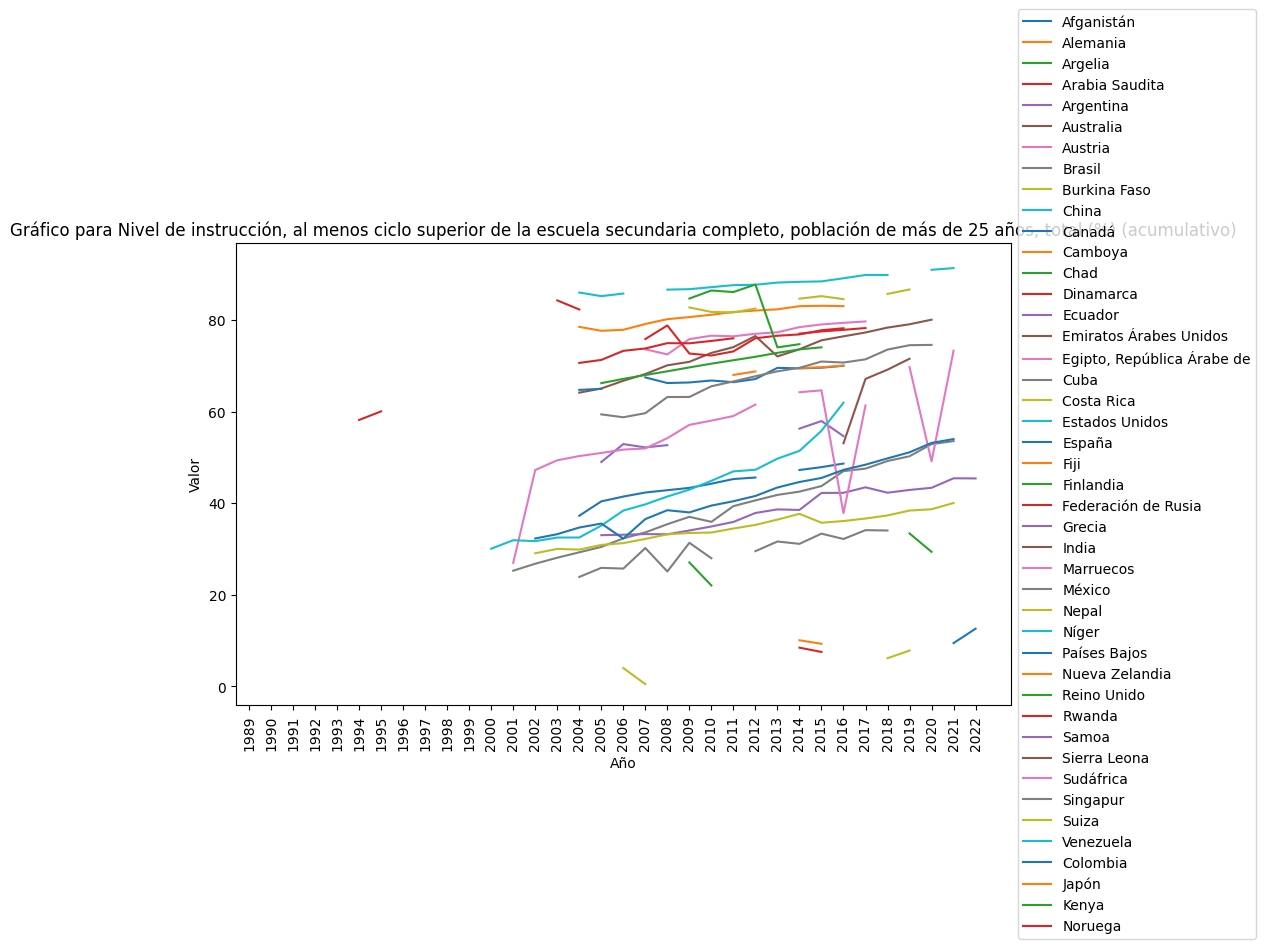

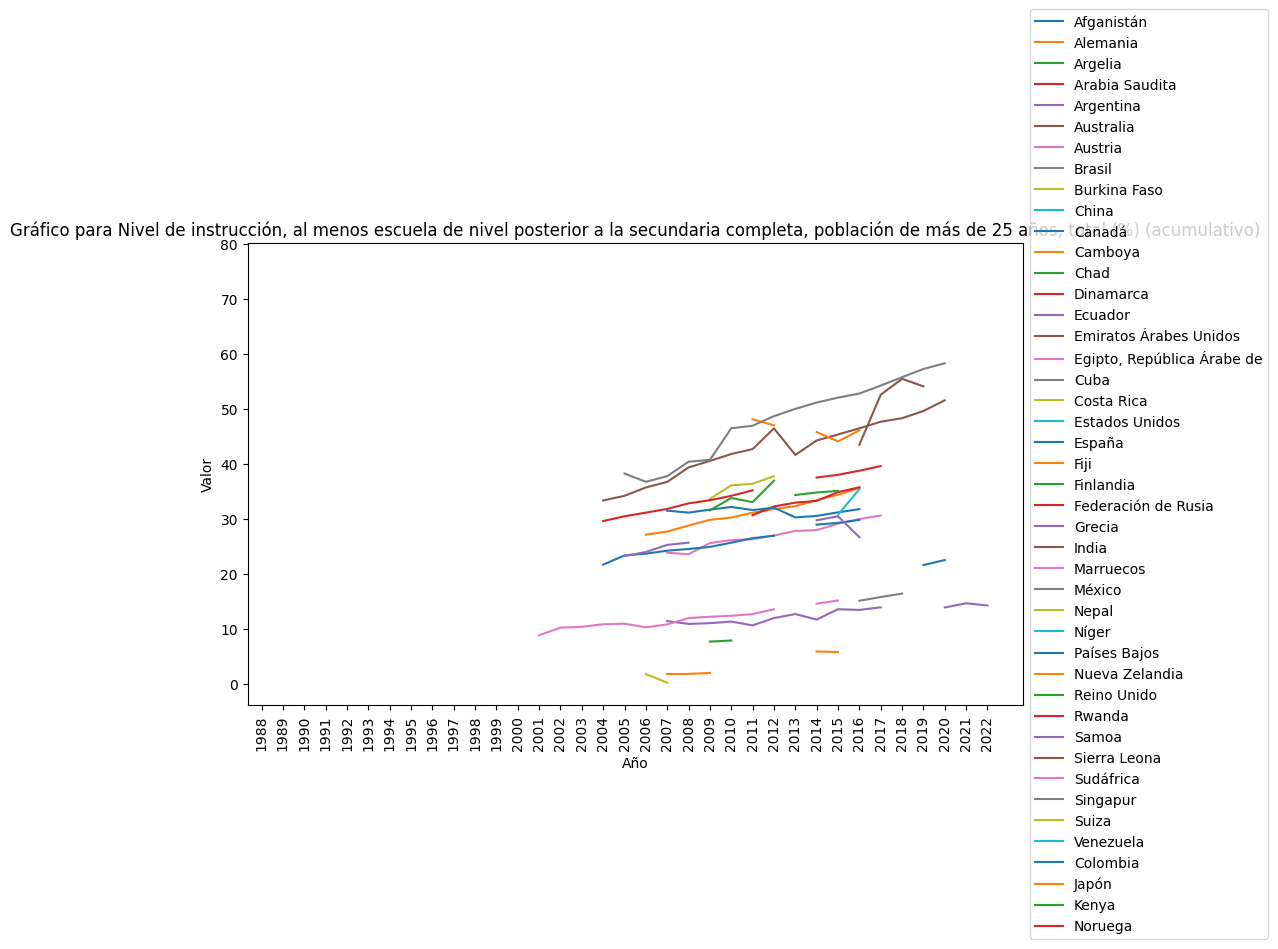

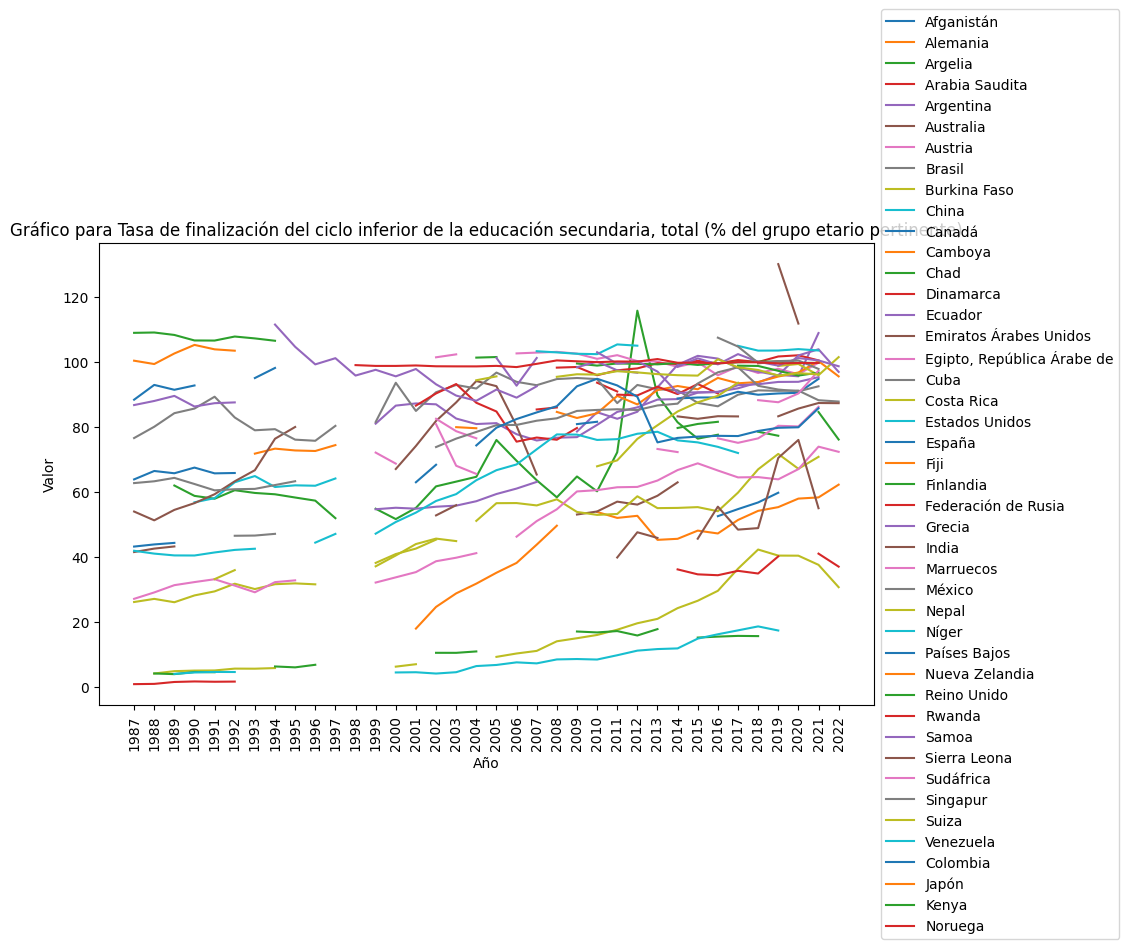

In [14]:
# Iterar sobre los dataframes
for nombre_grupo, dataframe in dataframes_por_grupo.items():
    # Obtener la lista de columnas para graficar (años)
    columnas_años = dataframe.columns[4:]
    
    # Configurar el gráfico
    plt.figure(figsize=(10, 6))
    plt.title(f'Gráfico para {nombre_grupo}')
    plt.xlabel('Año')
    plt.ylabel('Valor')
    
    # Iterar a través de las filas (paises)
    for i in range(len(dataframe)):
        # Obtener los valores (suponiendo que los valores comienzan en la cuarta columna)
        valores = dataframe.iloc[i, 4:]
        plt.plot(columnas_años, valores, label=dataframe.iloc[i, 0])  # El nombre del país está en la primera columna
    
    # Mostrar leyenda y gráfico
    # Posicionar la leyenda afuera del gráfico
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # Rotar las etiquetas del eje x a 90 grados
    plt.xticks(rotation=90)
    plt.show()
